In [1]:
import plotly.express as px
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16, 5)
plt.style.use('fivethirtyeight')

In [2]:
data = pd.read_csv('insurance.csv')
data.shape

(1338, 7)

In [3]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [4]:
px.scatter(data, y= 'charges', x='age',marginal_y='violin', trendline='ols')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [6]:
px.scatter(data, y= 'charges', x='bmi',marginal_y='violin', trendline='ols')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



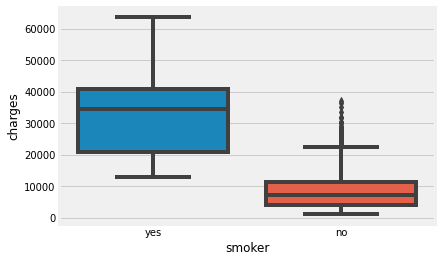

In [7]:
sns.boxplot(data['smoker'],data['charges'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



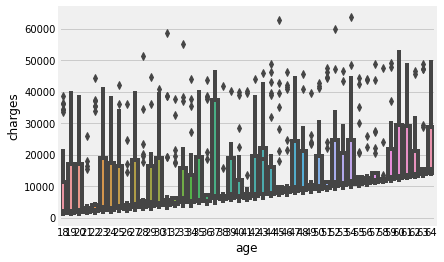

In [8]:
sns.boxplot(data['age'],data['charges'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



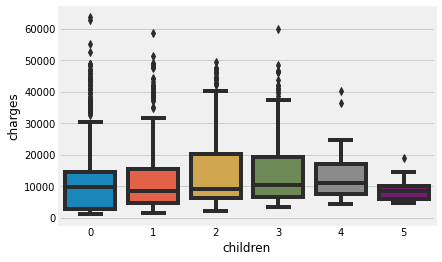

In [9]:
sns.boxplot(data['children'],data['charges'])

In [10]:
px.scatter(data, y= 'age', x='charges',color='smoker', facet_col='region', facet_row='children', trendline='ols')

In [11]:
px.scatter(data, y= 'bmi', x='charges',color='smoker', facet_col='region', facet_row='children', trendline='ols')

In [12]:
px.scatter(data, y= 'bmi', x='charges',color='smoker',size='age' ,hover_name='charges',size_max=15)

In [13]:
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [14]:
data['sex'] = data['sex'].replace(('male','female'),(2,1))

In [15]:
data['smoker'] = data['smoker'].replace(('yes','no'),(2,1))

In [16]:
data['region'] = data['region'].replace(('southeast','southwest','northeast','northwest'),(2,1,1,1))

In [17]:
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,2,1,16884.92400
1,18,2,33.770,1,1,2,1725.55230
2,28,2,33.000,3,1,2,4449.46200
3,33,2,22.705,0,1,1,21984.47061
4,32,2,28.880,0,1,1,3866.85520
5,31,1,25.740,0,1,2,3756.62160
6,46,1,33.440,1,1,2,8240.58960
7,37,1,27.740,3,1,1,7281.50560
8,37,2,29.830,2,1,1,6406.41070
9,60,1,25.840,0,1,1,28923.13692


In [18]:
y = data['charges']
x = data.drop(['charges'],axis=1)

In [19]:

y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [20]:
y.shape

(1338,)

In [21]:
x.head()

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,2,1
1,18,2,33.770,1,1,2
2,28,2,33.000,3,1,2
3,33,2,22.705,0,1,1
4,32,2,28.880,0,1,1


In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [23]:
x_train

,age,sex,bmi,children,smoker,region
621,37,2,34.100,4,2,1
194,18,2,34.430,0,1,2
240,23,1,36.670,2,2,1
1168,32,2,35.200,2,1,1
1192,58,1,32.395,1,1,1
...,...,...,...,...,...,...
763,27,2,26.030,0,1,1
835,42,2,35.970,2,1,2
1216,40,2,25.080,0,1,2
559,19,2,35.530,0,1,1


In [24]:
x_test

,age,sex,bmi,children,smoker,region
578,52,2,30.200,1,1,1
610,47,1,29.370,1,1,2
569,48,2,40.565,2,2,1
1034,61,2,38.380,0,1,1
198,51,1,18.050,0,1,1
...,...,...,...,...,...,...
1084,62,1,30.495,2,1,1
726,41,2,28.405,1,1,1
1132,57,2,40.280,0,1,1
725,30,1,39.050,3,2,2


LINEAR REGRESSION

In [25]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(x_train, y_train)
y_pred1 = model1.predict(x_test)

In [26]:
from sklearn.metrics import r2_score,mean_squared_error
mse = mean_squared_error(y_test, y_pred1)
rmse = np.sqrt(mse)
print("Root Mean Squared Eroor is : ",rmse)
r_score = r2_score(y_test, y_pred1)
print("R2 Score : ",r_score)

Root Mean Squared Eroor is :  5663.905095557446
R2 Score :  0.7984048983399955


In [27]:
x_test.shape

(268, 6)

In [28]:
test = [[34,2,30.2,3,2,2]]


In [34]:
pred1 = model1.predict(test)

In [35]:
pred1

array([30938.12865048])

RANDOM FOREST

In [31]:
from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor()
model2.fit(x_train,y_train)
y_pred2 = model2.predict(x_test)

In [33]:
from sklearn.metrics import r2_score,mean_squared_error
mse = mean_squared_error(y_test, y_pred2)
rmse = np.sqrt(mse)
print("Root Mean Squared Eroor is : ",rmse)
r_score = r2_score(y_test, y_pred2)
print("R2 Score : ",r_score)

Root Mean Squared Eroor is :  4417.337725486854
R2 Score :  0.8773777590576588


In [36]:
pred2 = model2.predict(test)
pred2

array([46020.2098656])

Gradient Boosting

In [37]:
from sklearn.ensemble import GradientBoostingRegressor
model3 = GradientBoostingRegressor()
model3.fit(x_train, y_train)
y_pred3 = model3.predict(x_test)

In [38]:
from sklearn.metrics import r2_score,mean_squared_error
mse = mean_squared_error(y_test, y_pred3)
rmse = np.sqrt(mse)
print("Root Mean Squared Eroor is : ",rmse)
r_score = r2_score(y_test, y_pred3)
print("R2 Score : ",r_score)

Root Mean Squared Eroor is :  4070.4061502080644
R2 Score :  0.8958825479131785


In [39]:
pred3 = model3.predict(test)
pred3

array([36449.39935761])